# Exploring Relationships in the NAEP Dataset


### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
     Missing Values
     Duplicate Checks
     Mixed-type Data
#### 3. Exploring Relationships
     Correlations
        Heatmaps
           First Group:    Inclduing the average assessment scores for each grade level
           Second Group:   Including a subset of demographic groups
     Scatterplots
     Pair Plots
     Categorical Plots
     
#### 4. Hypothesis

### Importing Visualization Libraries and Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path
path = r'/Users/azadehrezaei/Desktop/NAEP Results Analysis/02 Data'

In [3]:
# Import data
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'states_all_extended_clean.csv'))

In [4]:
df.head()

Unnamed: 0      PRIMARY_KEY       STATE  YEAR     ENROLL  TOTAL_REVENUE  \
0           0     2003_ALABAMA     ALABAMA  2003   727900.0      5196054.0   
1           1      2003_ALASKA      ALASKA  2003   133303.0      1425948.0   
2           2     2003_ARIZONA     ARIZONA  2003   875111.0      6529894.0   
3           3    2003_ARKANSAS    ARKANSAS  2003   450158.0      3241275.0   
4           4  2003_CALIFORNIA  CALIFORNIA  2003  6226552.0     59815855.0   

   FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  ...  \
0         567704.0      2966981.0      1661369.0          5298932.0  ...   
1         259423.0       813371.0       353154.0          1610289.0  ...   
2         740579.0      2912629.0      2876686.0          6210287.0  ...   
3         379947.0      2394336.0       466992.0          3242799.0  ...   
4        5795655.0     33617766.0     20402434.0         59749885.0  ...   

   G08_HI_A_READING  G08_HI_A_MATHEMATICS  G08_AS_A_READING  \
0               NaN                   NaN               NaN   
1               NaN                   NaN               NaN   
2               NaN                   NaN               NaN   
3               NaN                   NaN               NaN   
4               NaN                   NaN               NaN   

   G08_AS_A_MATHEMATICS  G08_AM_A_READING  G08_AM_A_MATHEMATICS  \
0                   NaN               NaN                   NaN   
1                   NaN               NaN                   NaN   
2                   NaN               NaN                   NaN   
3                   NaN               NaN                   NaN   
4                   NaN               NaN                   NaN   

   G08_HP_A_READING  G08_HP_A_MATHEMATICS  G08_TR_A_READING  \
0               NaN                   NaN               NaN   
1               NaN                   NaN               NaN   
2               NaN                   NaN               NaN   
3               NaN                   NaN               NaN   
4               NaN                   NaN               NaN   

   G08_TR_A_MATHEMATICS  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 69 columns]

### Data Cleaning

In [5]:
df.shape

(477, 69)

In [6]:
df.columns

Index(['Unnamed: 0', 'PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'A_A_A', 'G01_A_A', 'G02_A_A', 'G03_A_A',
       'G04_A_A', 'G05_A_A', 'G06_A_A', 'G07_A_A', 'G08_A_A', 'G09_A_A',
       'G10_A_A', 'G11_A_A', 'G12_A_A', 'KG_A_A', 'PK_A_A', 'G04_A_A_READING',
       'G04_A_A_MATHEMATICS', 'G04_A_M_READING', 'G04_A_M_MATHEMATICS',
       'G04_A_F_READING', 'G04_A_F_MATHEMATICS', 'G04_WH_A_READING',
       'G04_WH_A_MATHEMATICS', 'G04_BL_A_READING', 'G04_BL_A_MATHEMATICS',
       'G04_HI_A_READING', 'G04_HI_A_MATHEMATICS', 'G04_AS_A_READING',
       'G04_AS_A_MATHEMATICS', 'G04_AM_A_READING', 'G04_AM_A_MATHEMATICS',
       'G04_HP_A_READING', 'G04_HP_A_MATHEMATICS', 'G04_TR_A_READING',
       'G04_TR_A_MATHEMATICS', 'G08_A_A_READING', 'G08_A_A_MATHEMATICS',
       '

I decided to drop the columns that represent the enrollment data for all grade levels and only keep the total enroolment records for 4th and 8th grades. I am using a subset however so I can reuse the original clean data if needed. 

In [7]:
# Dropping extra columns
df_sub = df.drop(columns = ['Unnamed: 0', 'A_A_A', 'G01_A_A', 'G02_A_A', 'G03_A_A',
       'G05_A_A', 'G06_A_A', 'G07_A_A', 'G09_A_A',
       'G10_A_A', 'G11_A_A', 'G12_A_A', 'KG_A_A', 'PK_A_A'])

In [8]:
df_sub.head()

PRIMARY_KEY       STATE  YEAR     ENROLL  TOTAL_REVENUE  \
0     2003_ALABAMA     ALABAMA  2003   727900.0      5196054.0   
1      2003_ALASKA      ALASKA  2003   133303.0      1425948.0   
2     2003_ARIZONA     ARIZONA  2003   875111.0      6529894.0   
3    2003_ARKANSAS    ARKANSAS  2003   450158.0      3241275.0   
4  2003_CALIFORNIA  CALIFORNIA  2003  6226552.0     59815855.0   

   FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0         567704.0      2966981.0      1661369.0          5298932.0   
1         259423.0       813371.0       353154.0          1610289.0   
2         740579.0      2912629.0      2876686.0          6210287.0   
3         379947.0      2394336.0       466992.0          3242799.0   
4        5795655.0     33617766.0     20402434.0         59749885.0   

   INSTRUCTION_EXPENDITURE  ...  G08_HI_A_READING  G08_HI_A_MATHEMATICS  \
0                2817111.0  ...               NaN                   NaN   
1                 763525.0  ...               NaN                   NaN   
2                2810907.0  ...               NaN                   NaN   
3                1768713.0  ...               NaN                   NaN   
4               29561563.0  ...               NaN                   NaN   

   G08_AS_A_READING  G08_AS_A_MATHEMATICS  G08_AM_A_READING  \
0               NaN                   NaN               NaN   
1               NaN                   NaN               NaN   
2               NaN                   NaN               NaN   
3               NaN                   NaN               NaN   
4               NaN                   NaN               NaN   

   G08_AM_A_MATHEMATICS  G08_HP_A_READING  G08_HP_A_MATHEMATICS  \
0                   NaN               NaN                   NaN   
1                   NaN               NaN                   NaN   
2                   NaN               NaN                   NaN   
3                   NaN               NaN                   NaN   
4                   NaN               NaN                   NaN   

   G08_TR_A_READING  G08_TR_A_MATHEMATICS  
0               NaN                   NaN  
1               NaN                   NaN  
2               NaN                   NaN  
3               NaN                   NaN  
4               NaN                   NaN  

[5 rows x 55 columns]

In [9]:
df_sub.shape

(477, 55)

### Missing Values Check:

In [10]:
# Check for missing values

df_sub.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          120
TOTAL_REVENUE                   120
FEDERAL_REVENUE                 120
STATE_REVENUE                   120
LOCAL_REVENUE                   120
TOTAL_EXPENDITURE               120
INSTRUCTION_EXPENDITURE         120
SUPPORT_SERVICES_EXPENDITURE    120
OTHER_EXPENDITURE               120
CAPITAL_OUTLAY_EXPENDITURE      120
G04_A_A                          69
G08_A_A                          69
G04_A_A_READING                   0
G04_A_A_MATHEMATICS               0
G04_A_M_READING                   0
G04_A_M_MATHEMATICS               0
G04_A_F_READING                   0
G04_A_F_MATHEMATICS               0
G04_WH_A_READING                212
G04_WH_A_MATHEMATICS            212
G04_BL_A_READING                251
G04_BL_A_MATHEMATICS            248
G04_HI_A_READING                227
G04_HI_A_MATHEMATICS            227
G04_AS_A_READING            

### Missing values:
- Yes, there are a lot of missing values and that's unfortunate. The good news is: There are zero missing values for Mathematics and Reading average scores for both 4th and 8th grades and their sub categries of male/female (meaning: 4th grade males in math, 4th grade females in math, and the same for reading and the 8th grade level).
The missing values are mostly in the demographic levels for the two grade levels and the tests. 
At this point I am choosing to keep these missing values as-is.

### Duplicates Check:


In [36]:
# Find duplicates

df_dups = df_sub[df_sub.duplicated()] 

In [35]:
df_dups.shape   # There are no duplicates

(0, 55)

### Mixed-Type Data:

In [38]:
for col in df_sub.columns.tolist():
      weird = (df_sub[[col]].applymap(type) != df_sub[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_sub[weird]) > 0:
        print (col)
        
# No mixed-type columns either

## Exploring Relationships:


### Correlations:

In [39]:
# Create a correlation matrix using pandas

df_sub.corr()

YEAR    ENROLL  TOTAL_REVENUE  \
YEAR                          1.000000e+00  0.003884       0.091078   
ENROLL                        3.884396e-03  1.000000       0.944546   
TOTAL_REVENUE                 9.107760e-02  0.944546       1.000000   
FEDERAL_REVENUE               9.778926e-02  0.956003       0.925889   
STATE_REVENUE                 7.742686e-02  0.939214       0.972556   
LOCAL_REVENUE                 9.599336e-02  0.872007       0.963803   
TOTAL_EXPENDITURE             8.157277e-02  0.947230       0.999124   
INSTRUCTION_EXPENDITURE       9.251026e-02  0.903291       0.989377   
SUPPORT_SERVICES_EXPENDITURE  9.765384e-02  0.951818       0.994718   
OTHER_EXPENDITURE             8.631017e-02  0.977115       0.945297   
CAPITAL_OUTLAY_EXPENDITURE   -1.929476e-02  0.948862       0.918422   
G04_A_A                       1.867834e-02  0.998778       0.938924   
G08_A_A                      -3.213924e-03  0.998984       0.940531   
G04_A_A_READING               1.460837e-01 -0.063119       0.034165   
G04_A_A_MATHEMATICS           2.457056e-01 -0.028312       0.047277   
G04_A_M_READING               1.463323e-01 -0.045518       0.048360   
G04_A_M_MATHEMATICS           2.343441e-01 -0.020631       0.052055   
G04_A_F_READING               1.479178e-01 -0.089070       0.010441   
G04_A_F_MATHEMATICS           2.546309e-01 -0.031447       0.045617   
G04_WH_A_READING             -1.058355e-15  0.135894       0.198644   
G04_WH_A_MATHEMATICS         -6.779277e-02  0.102413       0.115551   
G04_BL_A_READING             -6.333308e-02  0.074674       0.100361   
G04_BL_A_MATHEMATICS         -7.170529e-02  0.123271       0.094471   
G04_HI_A_READING              5.074240e-02 -0.040084      -0.015471   
G04_HI_A_MATHEMATICS         -1.120267e-01 -0.011992      -0.053153   
G04_AS_A_READING              1.433235e-01  0.338792       0.346246   
G04_AS_A_MATHEMATICS          1.838163e-01  0.319975       0.316310   
G04_AM_A_READING             -1.321374e-02  0.194640       0.187462   
G04_AM_A_MATHEMATICS         -1.010938e-01  0.347901       0.366493   
G04_HP_A_READING             -2.224966e-01  0.337782       0.520351   
G04_HP_A_MATHEMATICS         -5.485971e-01  0.477365       0.082679   
G04_TR_A_READING             -1.422880e-02  0.224997       0.239990   
G04_TR_A_MATHEMATICS         -1.741852e-01  0.375507       0.375677   
G08_A_A_READING               1.339404e-01 -0.118749      -0.020872   
G08_A_A_MATHEMATICS           1.822025e-01 -0.051440       0.028944   
G08_A_M_READING               1.267146e-01 -0.091522       0.005416   
G08_A_M_MATHEMATICS           1.363501e-01 -0.039626       0.033728   
G08_A_F_READING               1.532093e-01 -0.144673      -0.048376   
G08_A_F_MATHEMATICS           2.279768e-01 -0.063363       0.023778   
G08_WH_A_READING             -7.715900e-02  0.049366       0.134971   
G08_WH_A_MATHEMATICS         -8.544819e-02  0.075771       0.129182   
G08_BL_A_READING             -2.743133e-01  0.004601       0.051921   
G08_BL_A_MATHEMATICS         -2.572926e-01  0.094332       0.117541   
G08_HI_A_READING             -1.002195e-01 -0.087497      -0.096653   
G08_HI_A_MATHEMATICS         -1.049847e-01  0.030134      -0.010229   
G08_AS_A_READING              2.052443e-01  0.203382       0.244291   
G08_AS_A_MATHEMATICS          1.840372e-01  0.251240       0.268274   
G08_AM_A_READING             -2.631650e-01  0.271664       0.285291   
G08_AM_A_MATHEMATICS         -7.056049e-02  0.083583       0.147938   
G08_HP_A_READING             -3.628177e-01  0.036735      -0.731029   
G08_HP_A_MATHEMATICS         -3.744661e-01  0.926362       0.006430   
G08_TR_A_READING             -1.382960e-01  0.036364       0.029455   
G08_TR_A_MATHEMATICS         -1.589413e-01  0.381124       0.365558   

                              FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  \
YEAR                                 0.097789       0.077427       0.095993   
ENROLL                               0.956003

In [45]:
df_sub.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'G04_A_A', 'G08_A_A', 'G04_A_A_READING',
       'G04_A_A_MATHEMATICS', 'G04_A_M_READING', 'G04_A_M_MATHEMATICS',
       'G04_A_F_READING', 'G04_A_F_MATHEMATICS', 'G04_WH_A_READING',
       'G04_WH_A_MATHEMATICS', 'G04_BL_A_READING', 'G04_BL_A_MATHEMATICS',
       'G04_HI_A_READING', 'G04_HI_A_MATHEMATICS', 'G04_AS_A_READING',
       'G04_AS_A_MATHEMATICS', 'G04_AM_A_READING', 'G04_AM_A_MATHEMATICS',
       'G04_HP_A_READING', 'G04_HP_A_MATHEMATICS', 'G04_TR_A_READING',
       'G04_TR_A_MATHEMATICS', 'G08_A_A_READING', 'G08_A_A_MATHEMATICS',
       'G08_A_M_READING', 'G08_A_M_MATHEMATICS', 'G08_A_F_READING',
       'G08_A_F_MATHEMATICS', 'G08_WH_A_READING', 'G08_WH_A_MATHEMATICS',
       'G08_BL_A_READING', 'G08_B

## Heatmaps:

### Correlation Groups:

Looking through the correlation Matrix, I have too many variables to show in a chart and there are possible correlations between the tests subjest and the state/federal revenues and some of the specific demographics. 
For this reason, I am going to create two subgroups for this dataset so I can create the correlation heatmap for each group separately. 

- First Group: The first 6 variables ('YEAR', 'TOTAL_REVENUE','STATE_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',) 
        and the assessment subjects in each grade level
       
- Second Group: The firsy 6 variables and select demographics in each grade level for each assessment subject. 

### First Group:

In [36]:
# First group subset for correlation heatmap:
cor1 =  df_sub[['YEAR', 'TOTAL_REVENUE',
       'STATE_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE',
       'G04_A_A_READING',
       'G04_A_A_MATHEMATICS', 'G08_A_A_READING', 'G08_A_A_MATHEMATICS']]

In [17]:
# There are missing values for State/Federal and Local Revenues for the years 2017 and 2019 so I'm removing it from the matric heatmap 
cor1 = cor1[cor1['YEAR']< 2017]

In [20]:
cor1.shape

(371, 10)

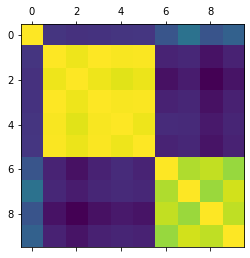

In [21]:
# Create a correlation heatmap using matplotlib

plt.matshow(cor1.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Group 1')

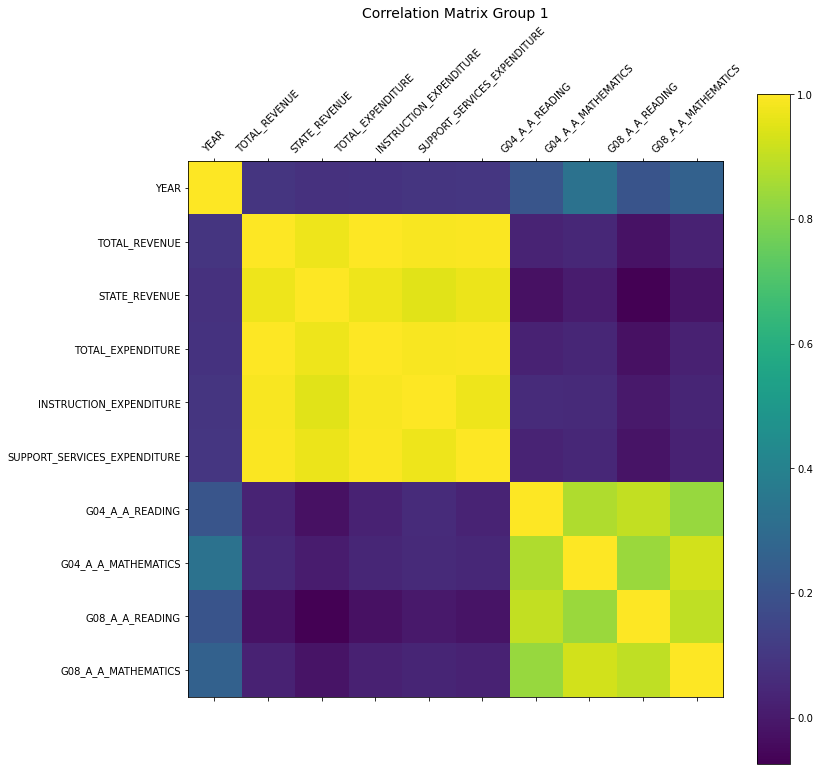

In [24]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(12, 12)) # figure size 
plt.matshow(cor1.corr(), fignum=f.number) # type of plot
plt.xticks(range(cor1.shape[1]), cor1.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(cor1.shape[1]), cor1.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix Group 1', fontsize=14) # add title

### Create a correlation heatmap using seaborn:

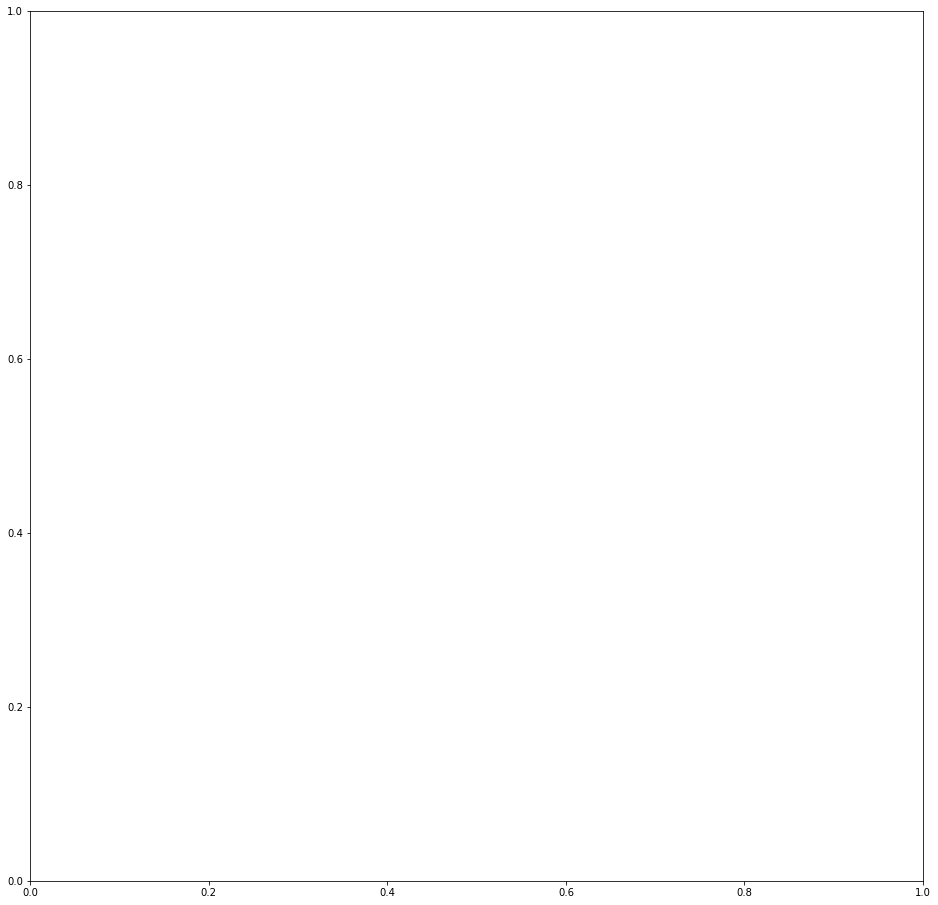

In [30]:
# Create a subplot with matplotlib:

f,ax = plt.subplots(figsize=(16,16))

In [63]:
# Create the correlation heatmap in seaborn:

corr = sns.heatmap(cor1.corr(), annot = True, ax = ax) 



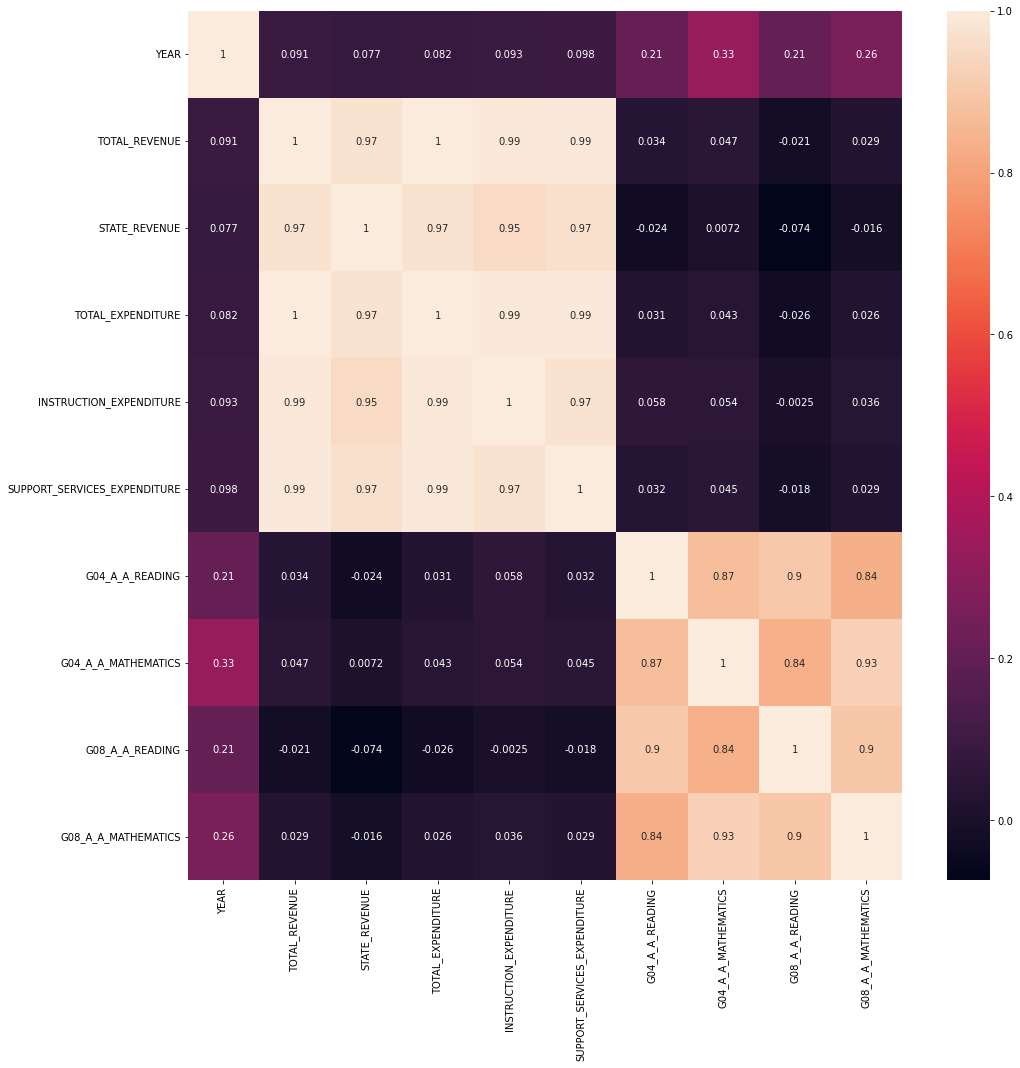

In [32]:
corr.figure

### Second Group:

In [33]:
df_sub.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'G04_A_A', 'G08_A_A', 'G04_A_A_READING',
       'G04_A_A_MATHEMATICS', 'G04_A_M_READING', 'G04_A_M_MATHEMATICS',
       'G04_A_F_READING', 'G04_A_F_MATHEMATICS', 'G04_WH_A_READING',
       'G04_WH_A_MATHEMATICS', 'G04_BL_A_READING', 'G04_BL_A_MATHEMATICS',
       'G04_HI_A_READING', 'G04_HI_A_MATHEMATICS', 'G04_AS_A_READING',
       'G04_AS_A_MATHEMATICS', 'G04_AM_A_READING', 'G04_AM_A_MATHEMATICS',
       'G04_HP_A_READING', 'G04_HP_A_MATHEMATICS', 'G04_TR_A_READING',
       'G04_TR_A_MATHEMATICS', 'G08_A_A_READING', 'G08_A_A_MATHEMATICS',
       'G08_A_M_READING', 'G08_A_M_MATHEMATICS', 'G08_A_F_READING',
       'G08_A_F_MATHEMATICS', 'G08_WH_A_READING', 'G08_WH_A_MATHEMATICS',
       'G08_BL_A_READING', 'G08_B

In [35]:
# Second group subset for correlation heatmap:
# I am using demograohic groups for Math & Reading assessments in this group. Using Hispanic, White and black subsets since
# these 3 groups have the least missing values. I am also using the data from 2011 - 2019 in this group
cor2 =  df_sub[['YEAR', 'TOTAL_REVENUE',
       'STATE_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE',
       'G04_WH_A_READING', 'G04_WH_A_MATHEMATICS', 
       'G04_BL_A_READING', 'G04_BL_A_MATHEMATICS',
       'G04_HI_A_READING', 'G04_HI_A_MATHEMATICS', 
       'G08_WH_A_READING', 'G08_WH_A_MATHEMATICS',
       'G08_BL_A_READING', 'G08_BL_A_MATHEMATICS', 
       'G08_HI_A_READING', 'G08_HI_A_MATHEMATICS']]

In [37]:
# Keeping the demographic data for the years 2011 and later: 
cor2 = cor2[cor2['YEAR']> 2010]

In [38]:
cor2.shape

(265, 18)

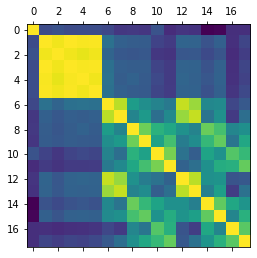

In [39]:
# Create a correlation heatmap using matplotlib

plt.matshow(cor2.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Group 1')

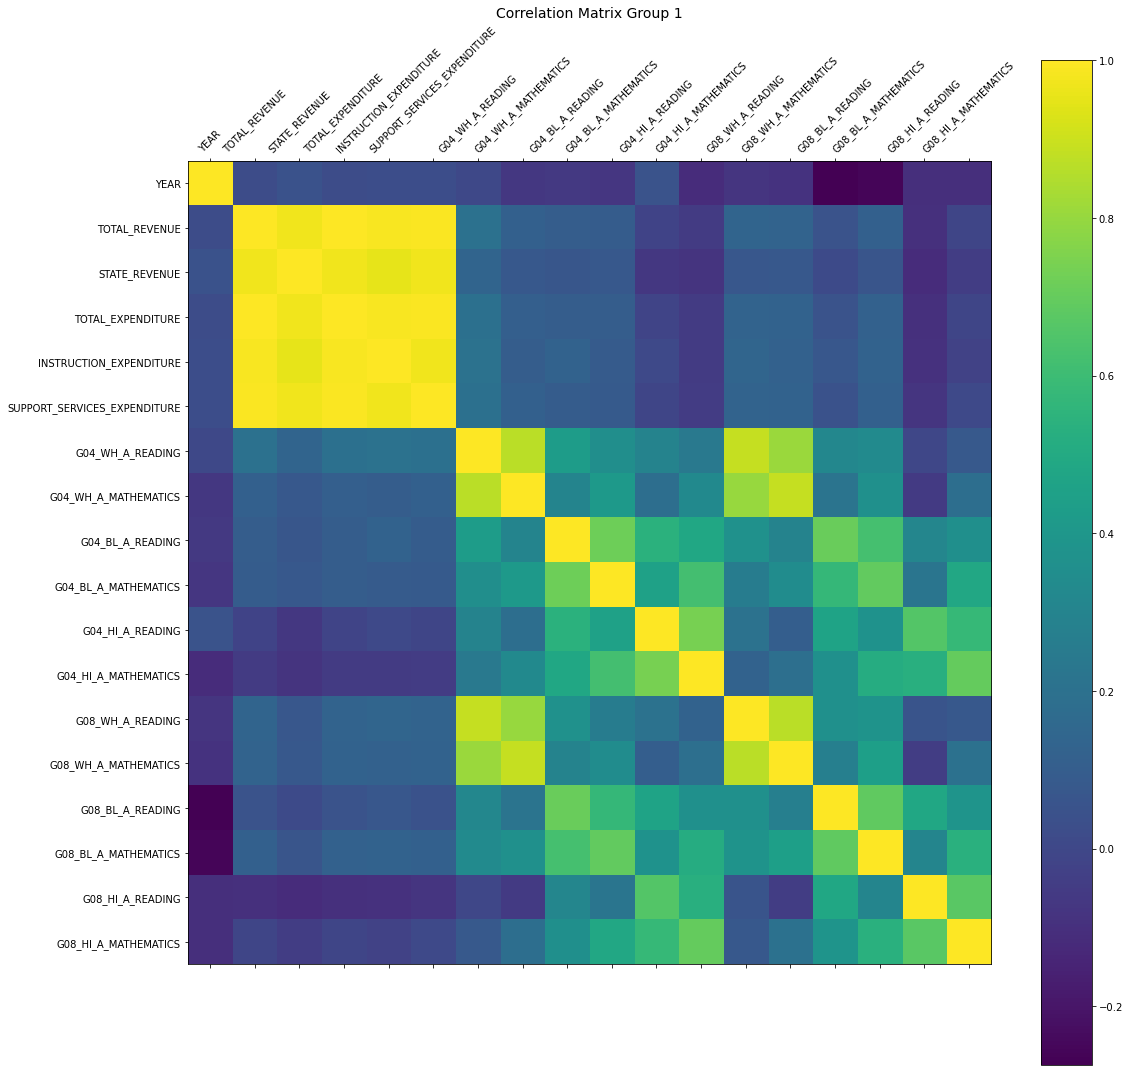

In [40]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(18, 18)) # figure size 
plt.matshow(cor2.corr(), fignum=f.number) # type of plot
plt.xticks(range(cor2.shape[1]), cor2.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(cor2.shape[1]), cor2.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix Group 1', fontsize=14) # add title

### Create a correlation heatmap using seaborn:

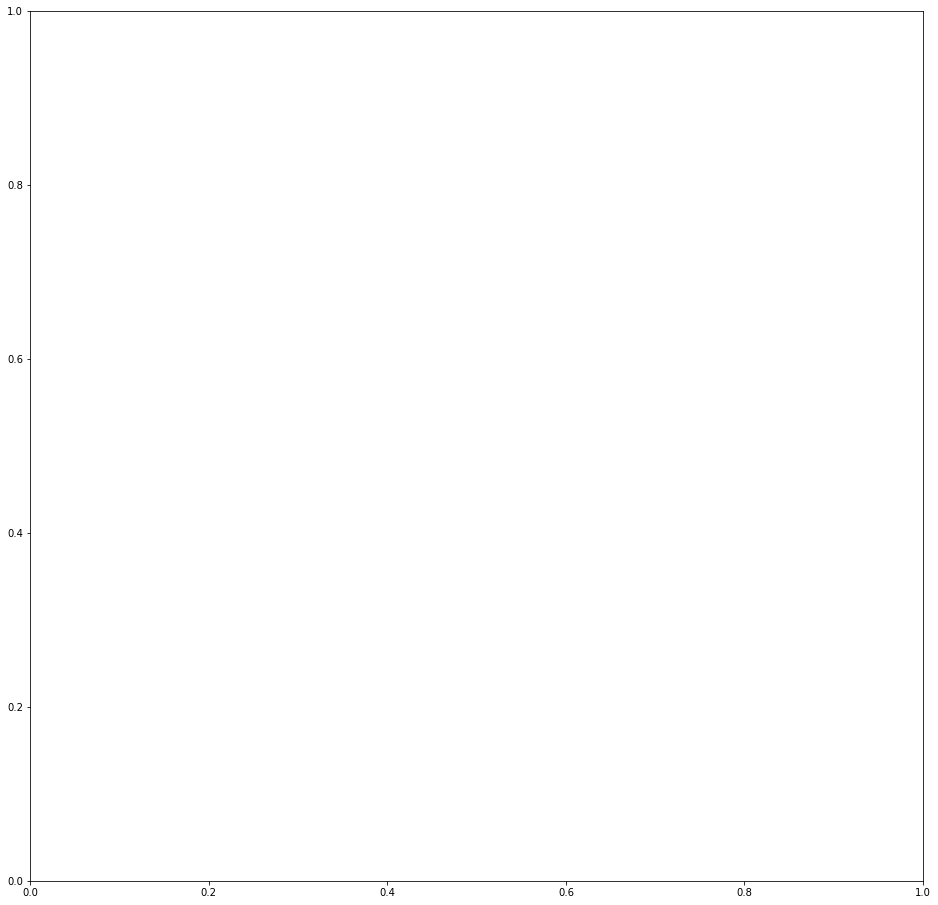

In [41]:
# Create a subplot with matplotlib:

f,ax = plt.subplots(figsize=(16,16))

In [42]:
# Create the correlation heatmap in seaborn:

corr2 = sns.heatmap(cor2.corr(), annot = True, ax = ax) 




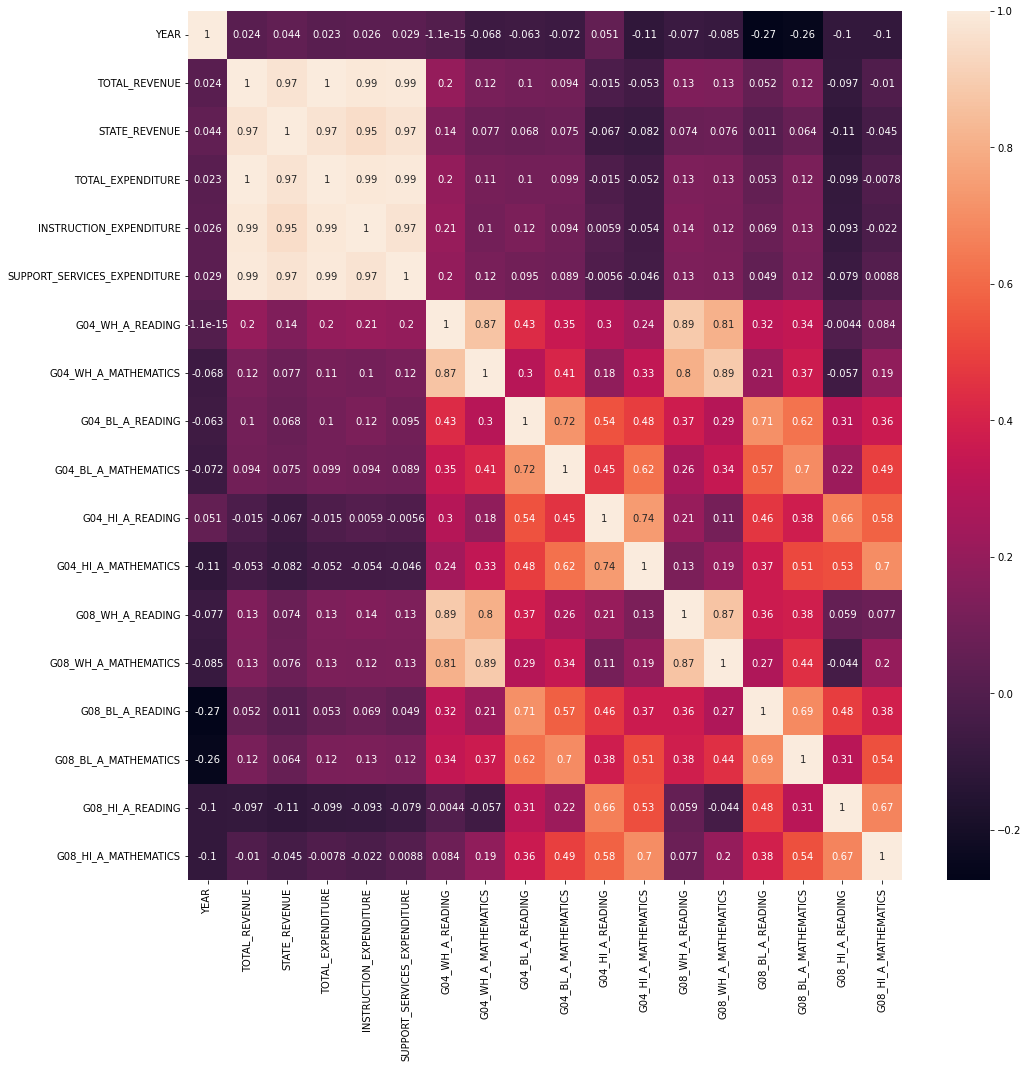

In [43]:
corr2.figure

- I did not get the exact results I was expecting. 
Initially I assumed that there would be stronger correlation between the revenues and the test scores in different demographics but the correlation coefficient is mostly very small. 
What is interesting however is the difference between the correlation coefficient between different demographic groups. There seems to be a stronger correlation between the revenues and white student demographic groups' test scores than in-between black and hispanic student demographics. 
This means that although so far the analysis has not found strong a strong correlation between test scores and revenues, the effects seem to be stronger for the white student populations than black and hispanic student groups. 

## Scatterplots:

- Creating scatterplots for the variables with the strongest correlations.

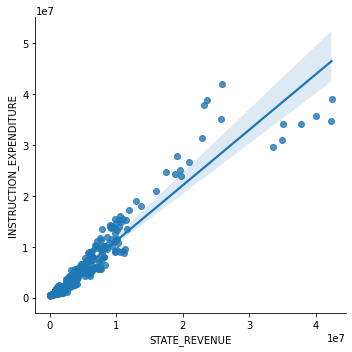

In [46]:
# Create a scatterplot for the "STATE_REVENUE" and "INSTRUCTION_EXPENDITURE" columns in seaborn

sns.lmplot(x = 'STATE_REVENUE', y = 'INSTRUCTION_EXPENDITURE', data = df_sub)

- Not very surprisingly to see that states generally tend to spend more on "Instruction" depending on their revenue. 
It is interesting however to see the outliers which are states that spend more than expected on their "Instruction_Expenditure" and the opposite, states that spend less than expected. As a follow up to this insight, we could isolate these states and compare the student perforamces in different subjects betwene these two groups.

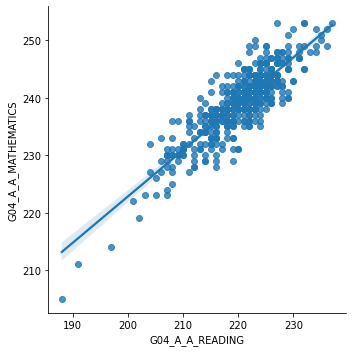

In [47]:
# Create a scatterplot for the "G04_A_A_READING" and "G04_A_A_MATHEMATICS" columns in seaborn


sns.lmplot(x = 'G04_A_A_READING', y = 'G04_A_A_MATHEMATICS', data = df_sub) # in both matrix heatmaps there was evicence of strong correlation between math and reading test scores in each grade level

- This just goes to show strong correlation between these test scores. Meaning that usually a student that scores higher in reading, scores high in math as well. 

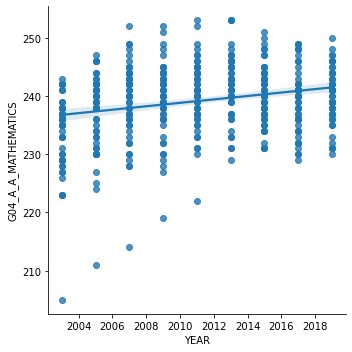

In [48]:
# Create a scatterplot for the "YEAR" and "G04_A_A_MATHEMATICS" columns in seaborn


sns.lmplot(x = 'YEAR', y = 'G04_A_A_MATHEMATICS', data = df_sub)

- The overall trend of 4th grade math scores has been increaing, BUT it looks like after 2013's assessment, the average math score in 4th grade level has been decreasing.

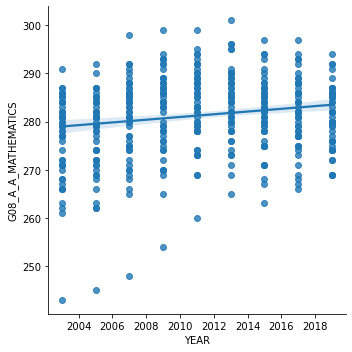

In [51]:
# Create a scatterplot for the "YEAR" and "G08_A_A_MATHEMATICS" columns in seaborn


sns.lmplot(x = 'YEAR', y = 'G08_A_A_MATHEMATICS', data = df_sub)


- The overall trend of 8th grade math scores has been increaing, BUT it looks like after 2015's assessment, the average math score in 8th grade level has been decreasing.

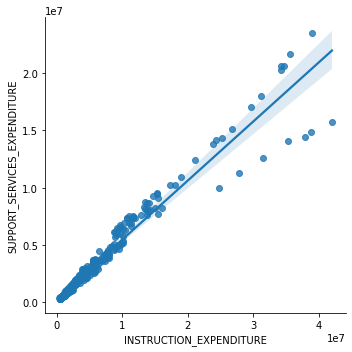

In [52]:
# Create a scatterplot for the "INSTRUCTION_EXPENDITURE" and "INSTRUCTION_EXPENDITURE" columns in seaborn


sns.lmplot(x = 'INSTRUCTION_EXPENDITURE', y = 'SUPPORT_SERVICES_EXPENDITURE', data = df_sub)

- There is a positive correlation betwene the "Support_Services_Expenditure" and the "Instruction_expenditure" as expected. This means that support services will get more help and support as the instruction expenditure goes up. BUT, again it' sinteresting to see that support services mostly get more help than expected, as they should, compared to the line of best fit. It is however interesting to see a group of data points under the line of best fit that show instances where the support services have receieved help much less than expected, eventhough the instruction expenditure has been higher. 

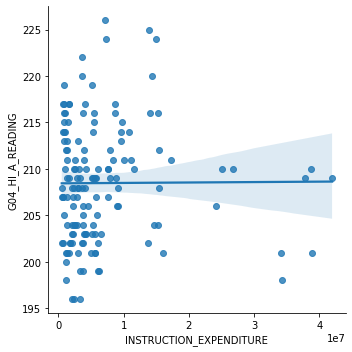

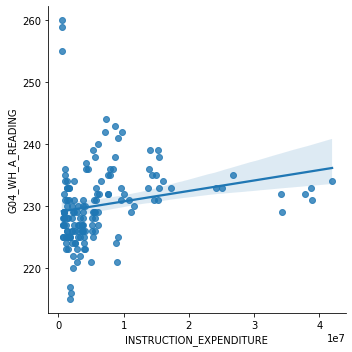

In [62]:
# Create a scatterplot for the "INSTRUCTION_EXPENDITURE" and "INSTRUCTION_EXPENDITURE" columns in seaborn


sns.lmplot(x = 'INSTRUCTION_EXPENDITURE', y = 'G04_HI_A_READING', data = df_sub) # Hispanics
sns.lmplot(x = 'INSTRUCTION_EXPENDITURE', y = 'G04_WH_A_READING', data = df_sub) # White students


- Definitely not a strong correlation in either one of these two groups (white and hispanic students) BUT as expected, the cluster of points in the second graph shows stronger correlation in the white studnet population and instruction_expenditure than in the hispanic student population. 

## Pair Plots:

In [68]:
df_sub.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'G04_A_A', 'G08_A_A', 'G04_A_A_READING',
       'G04_A_A_MATHEMATICS', 'G04_A_M_READING', 'G04_A_M_MATHEMATICS',
       'G04_A_F_READING', 'G04_A_F_MATHEMATICS', 'G04_WH_A_READING',
       'G04_WH_A_MATHEMATICS', 'G04_BL_A_READING', 'G04_BL_A_MATHEMATICS',
       'G04_HI_A_READING', 'G04_HI_A_MATHEMATICS', 'G04_AS_A_READING',
       'G04_AS_A_MATHEMATICS', 'G04_AM_A_READING', 'G04_AM_A_MATHEMATICS',
       'G04_HP_A_READING', 'G04_HP_A_MATHEMATICS', 'G04_TR_A_READING',
       'G04_TR_A_MATHEMATICS', 'G08_A_A_READING', 'G08_A_A_MATHEMATICS',
       'G08_A_M_READING', 'G08_A_M_MATHEMATICS', 'G08_A_F_READING',
       'G08_A_F_MATHEMATICS', 'G08_WH_A_READING', 'G08_WH_A_MATHEMATICS',
       'G08_BL_A_READING', 'G08_B

In [78]:
# Keeping only the variables I want to use in the pair plot

df_pairplots1 = df_sub[['YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE',
       'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE',
       'G04_A_A', 'G08_A_A', 
       'G04_A_A_READING', 'G04_A_A_MATHEMATICS',                               
       'G08_A_A_READING', 'G08_A_A_MATHEMATICS']]

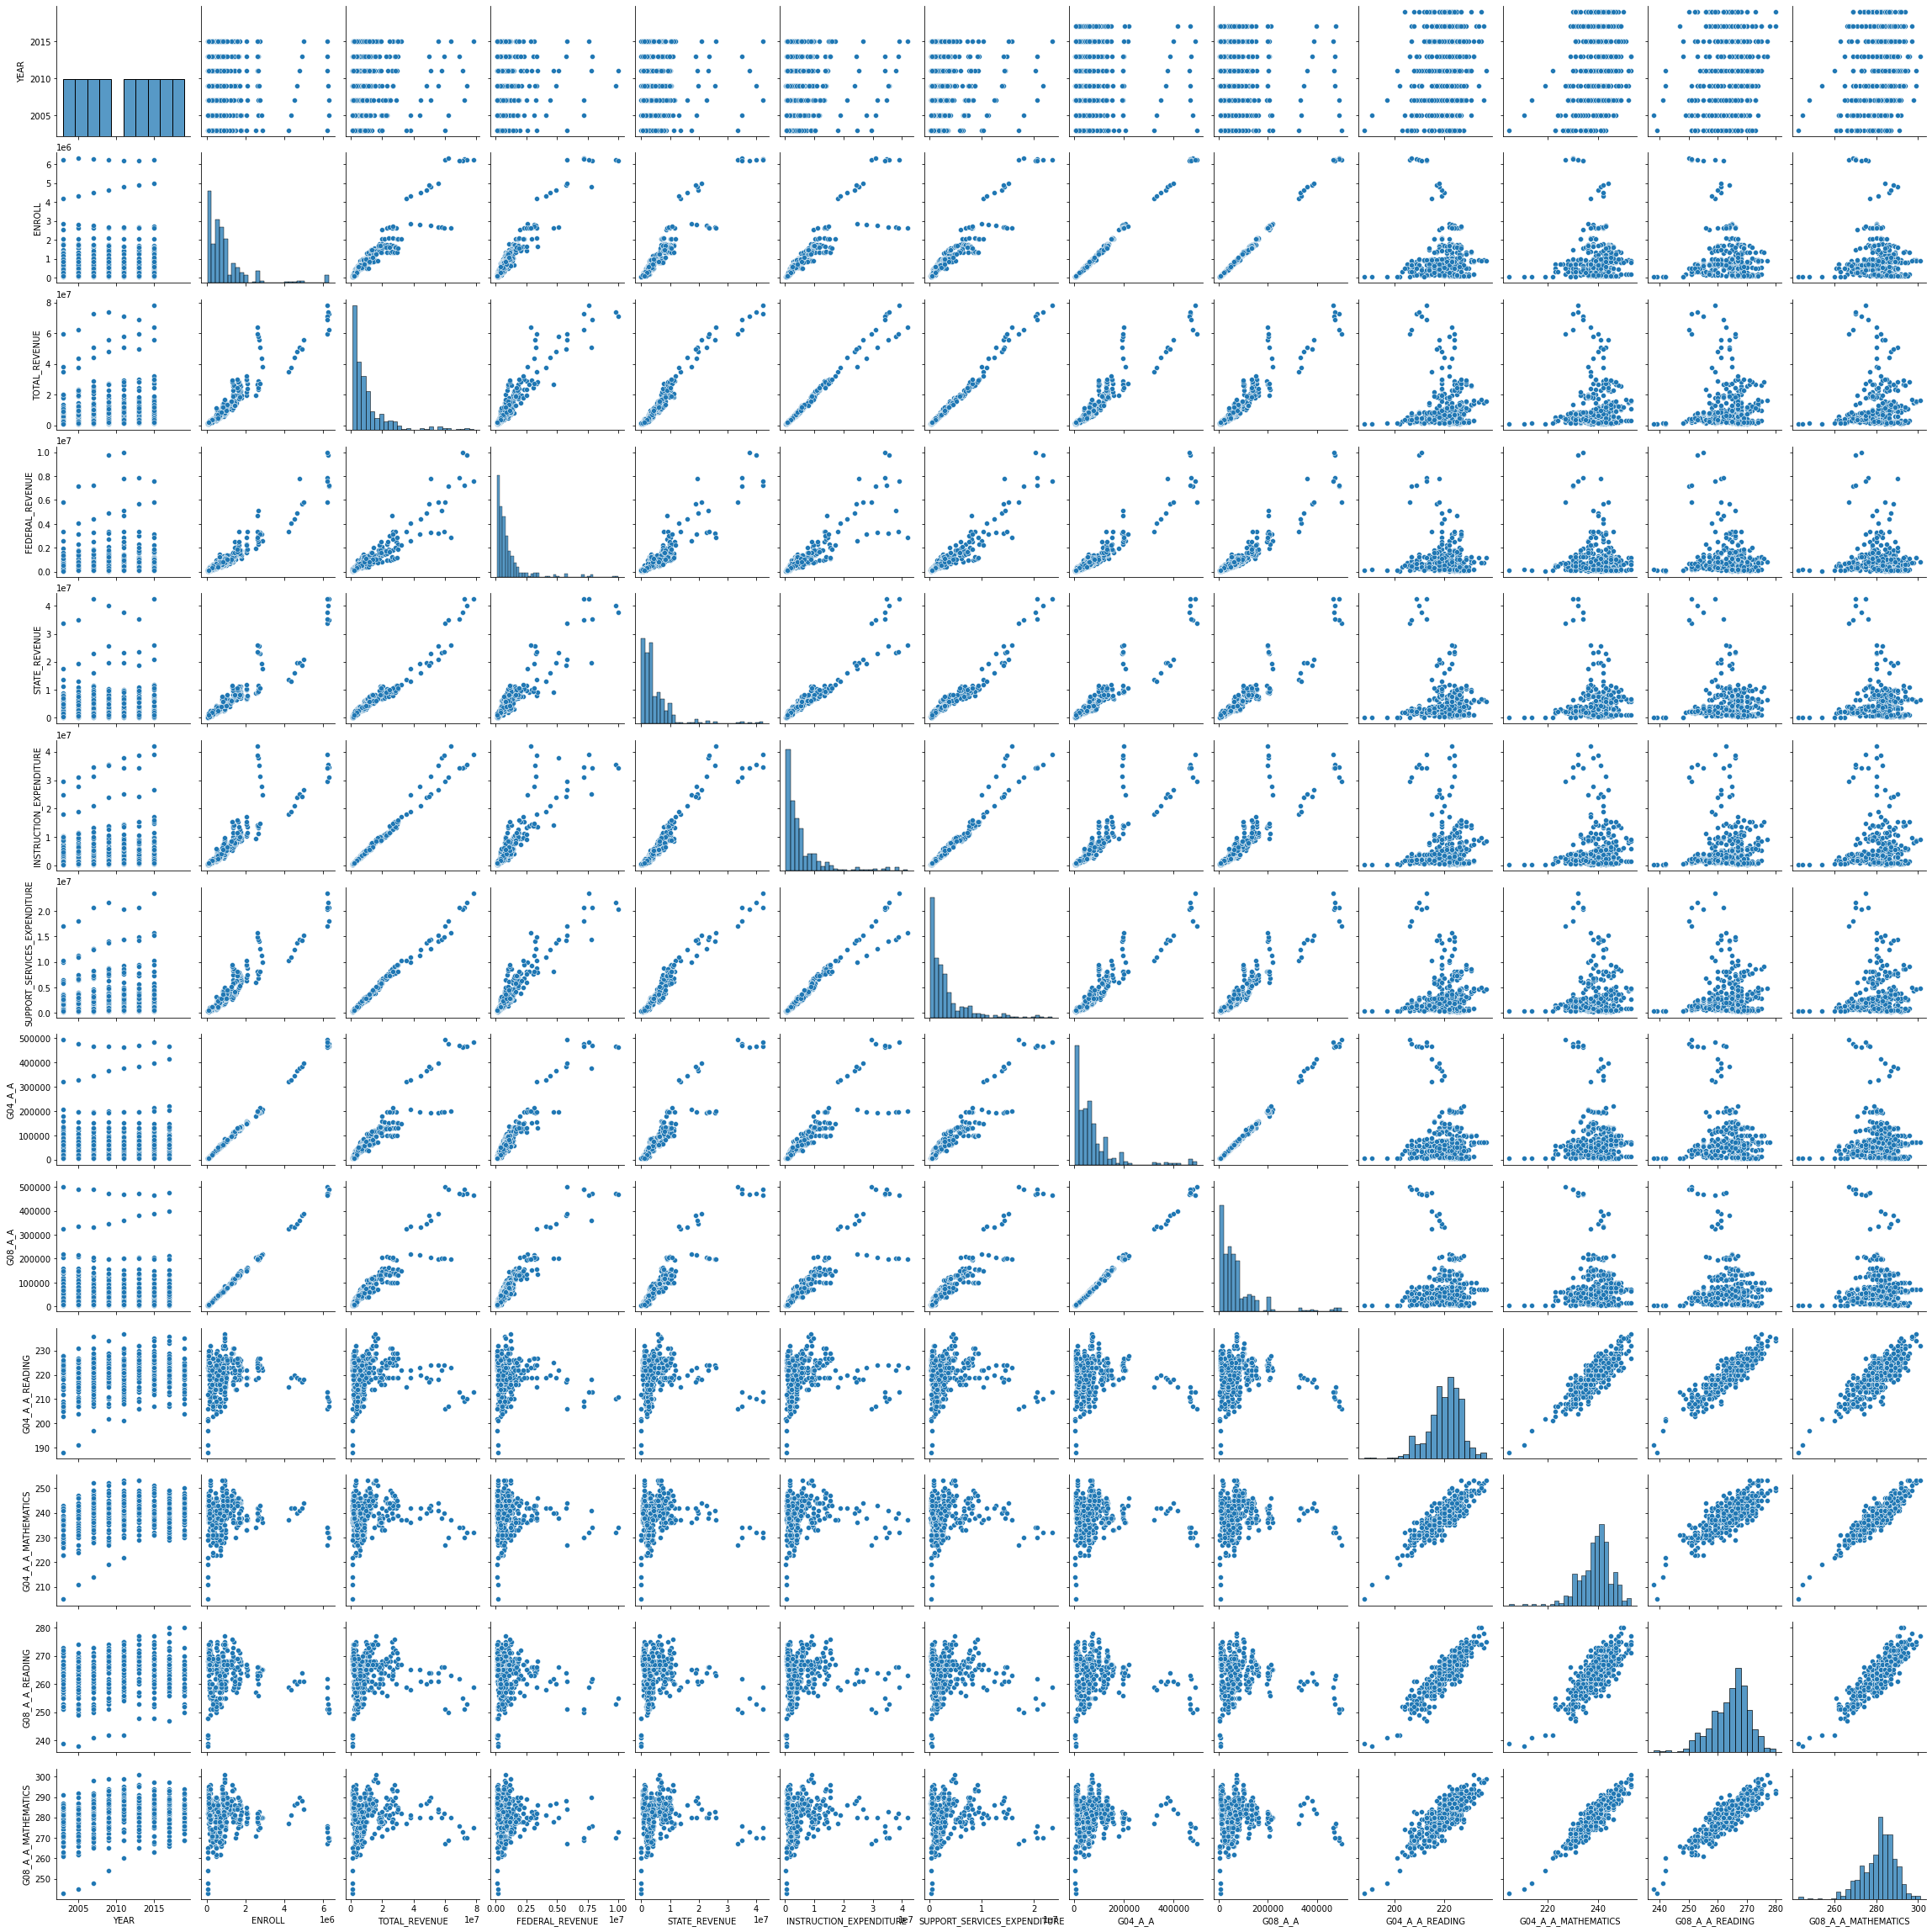

In [79]:
# Create a pair plot 

Pairplot1 = sns.pairplot(df_pairplots1)

In [80]:
# Keeping only the variables I want to use in the pair plot

df_pairplots2 = df_sub[['YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE',
       'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE',        
                        
       'G04_WH_A_READING','G04_WH_A_MATHEMATICS', 
       'G04_BL_A_READING','G04_BL_A_MATHEMATICS',
       'G04_HI_A_READING','G04_HI_A_MATHEMATICS',                 
      
       'G08_WH_A_READING', 'G08_WH_A_MATHEMATICS',                  
       'G08_BL_A_READING', 'G08_BL_A_MATHEMATICS', 
       'G08_HI_A_READING', 'G08_HI_A_MATHEMATICS']]

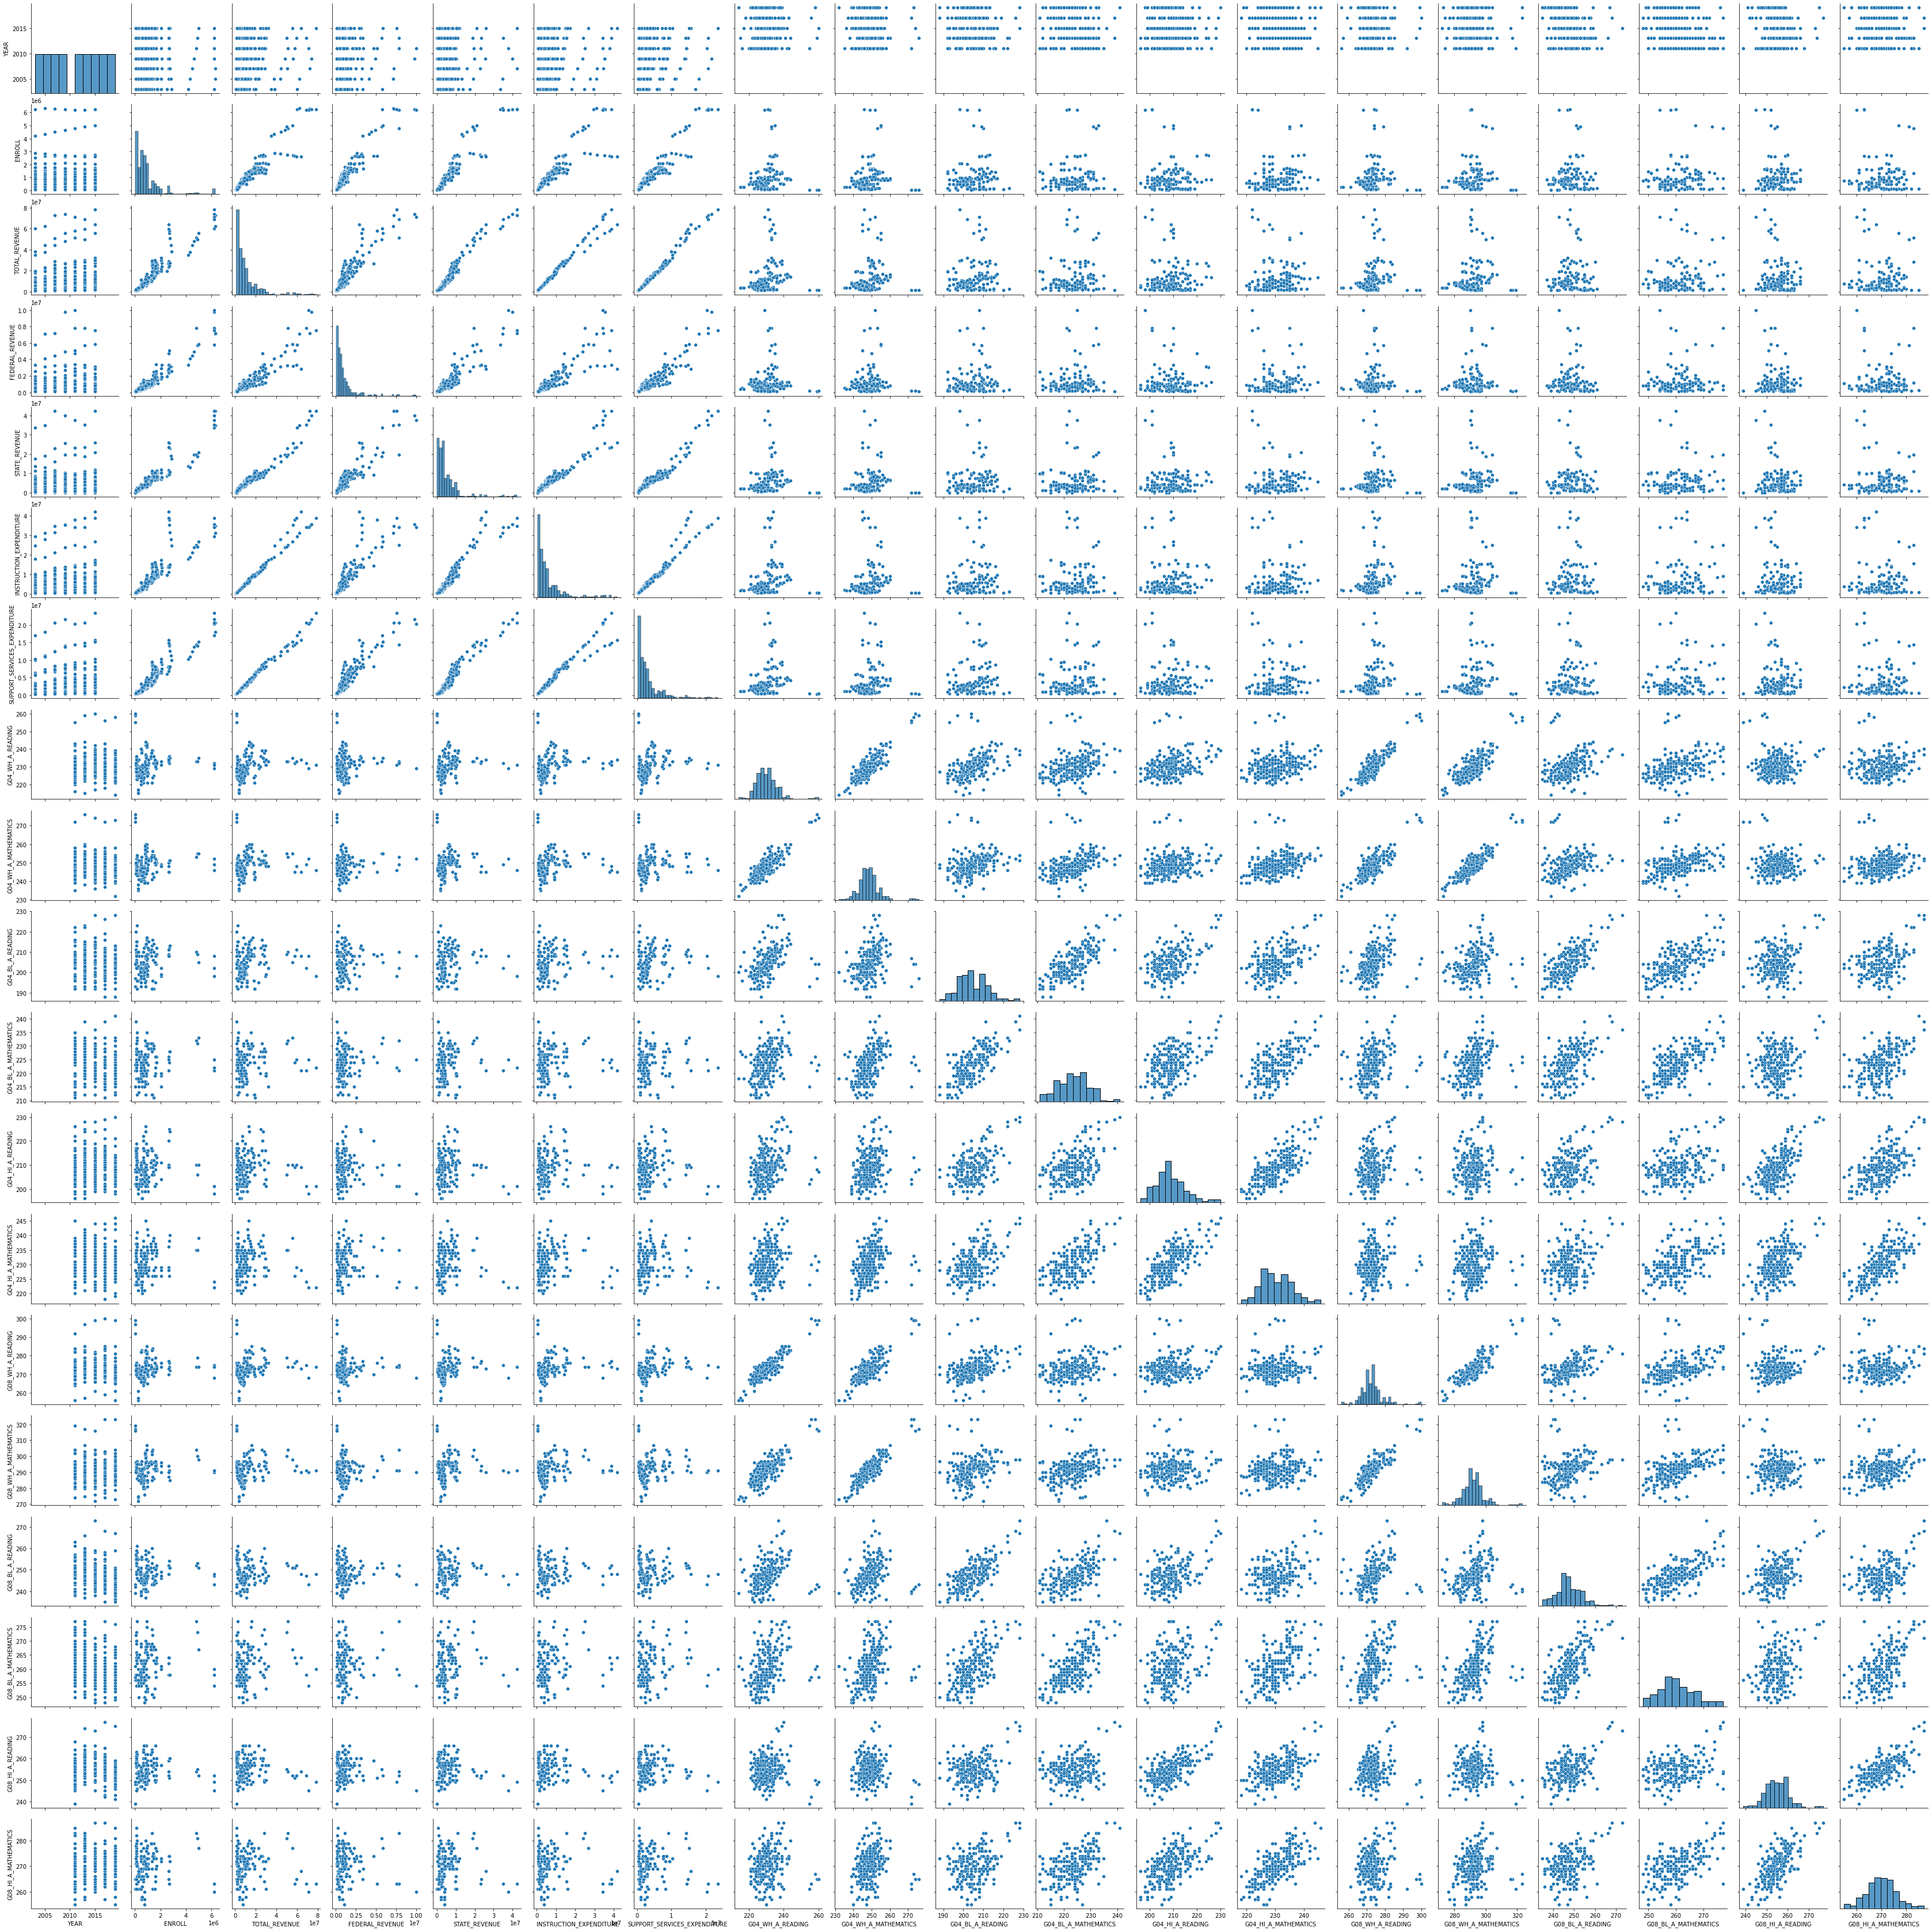

In [81]:
# Create a pair plot 

Pairplot2 = sns.pairplot(df_pairplots2)

## Categorical Plots:

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE', ylabel='Count'>

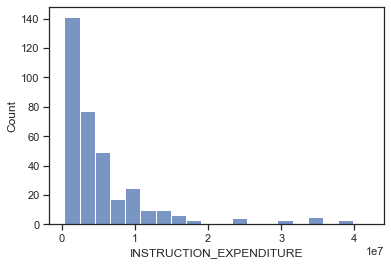

In [181]:
# Using a histogram to visualize the distribution of the variables:

sns.histplot(df_sub['INSTRUCTION_EXPENDITURE'], bins = 20)

<AxesSubplot:xlabel='SUPPORT_SERVICES_EXPENDITURE', ylabel='Count'>

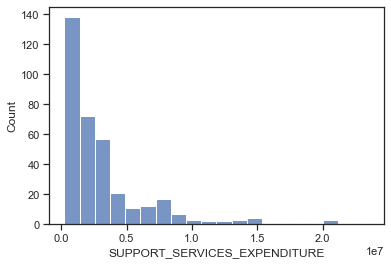

In [179]:
# Using a histogram to visualize the distribution of the variables:

sns.histplot(df_sub['SUPPORT_SERVICES_EXPENDITURE'], bins = 20)

<AxesSubplot:xlabel='G04_A_A_READING', ylabel='Count'>

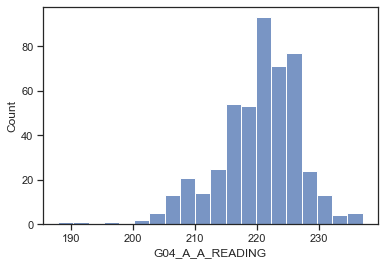

In [178]:
# Using a histogram to visualize the distribution of the variables:

sns.histplot(df_sub['G04_A_A_READING'], bins = 20)

<AxesSubplot:xlabel='G08_A_A_READING', ylabel='Count'>

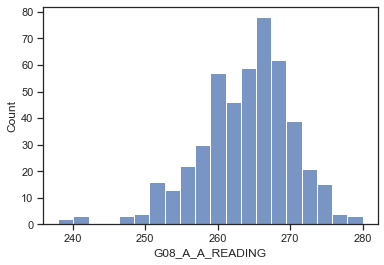

In [174]:
# Using a histogram to visualize the distribution of the variables:

sns.histplot(df_sub['G08_A_A_READING'], bins = 20)

<AxesSubplot:xlabel='G04_A_A_MATHEMATICS', ylabel='Count'>

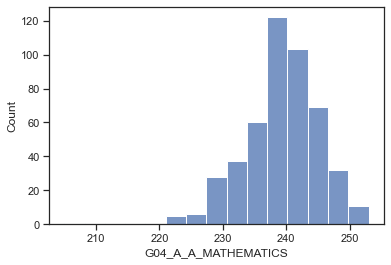

In [176]:
# Using a histogram to visualize the distribution of the variables:

sns.histplot(df_sub['G04_A_A_MATHEMATICS'], bins = 15)

<AxesSubplot:xlabel='G08_A_A_MATHEMATICS', ylabel='Count'>

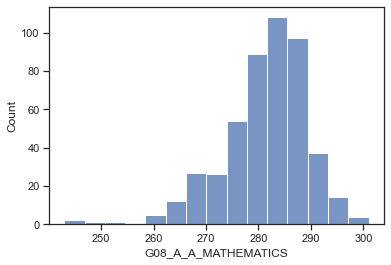

In [177]:
# Using a histogram to visualize the distribution of the variables:

sns.histplot(df_sub['G08_A_A_MATHEMATICS'], bins = 15)

## NAEP Mathematics Assessment:

##### Average scores are reported on a 0–500 scale at grades 4 and 8; however, the scale scores were derived separately and therefore scores cannot be compared across grades.

The NAEP Mathematics Achievement Levels by Grade
- Grade 4 Mathematics:

  <p> - NAEP Basic 214 </p>
  <p> - NAEP Proficient 249 </p>
  <p> - NAEP Advanced 282 </p>


- Grade 8 Mathematics:

  <p> - NAEP Basic 262 </p>
  <p> - NAEP Proficient 299 </p>
  <p> - NAEP Advanced 333 </p>
  
  
Source:  https://nces.ed.gov/nationsreportcard/mathematics/achieve.aspx

### 4th Grade Math:


Grade 4 Mathematics:
- NAEP Basic    214
- NAEP Proficient    249
- NAEP Advanced    282

In [82]:
df_sub.loc[df_sub['G04_A_A_MATHEMATICS'] < 214, 'Grade 4 Mathematics'] = 'Under NAEP Basic Level'

In [140]:
df_sub.loc[(df_sub['G04_A_A_MATHEMATICS'] >= 214) & (df_sub['G04_A_A_MATHEMATICS'] < 249), 'Grade 4 Mathematics'] = 'NAEP Basic Level'

In [141]:
df_sub.loc[(df_sub['G04_A_A_MATHEMATICS'] >= 249) & (df_sub['G04_A_A_MATHEMATICS'] < 282), 'Grade 4 Mathematics'] = 'NAEP Proficient Level'

In [142]:
df_sub.loc[df_sub['G04_A_A_MATHEMATICS'] >= 282, 'Grade 4 Mathematics'] = 'NAEP Advanced Level & Above'

In [137]:
df_sub.head()

PRIMARY_KEY       STATE  YEAR     ENROLL  TOTAL_REVENUE  \
0     2003_ALABAMA     ALABAMA  2003   727900.0      5196054.0   
1      2003_ALASKA      ALASKA  2003   133303.0      1425948.0   
2     2003_ARIZONA     ARIZONA  2003   875111.0      6529894.0   
3    2003_ARKANSAS    ARKANSAS  2003   450158.0      3241275.0   
4  2003_CALIFORNIA  CALIFORNIA  2003  6226552.0     59815855.0   

   FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0         567704.0      2966981.0      1661369.0          5298932.0   
1         259423.0       813371.0       353154.0          1610289.0   
2         740579.0      2912629.0      2876686.0          6210287.0   
3         379947.0      2394336.0       466992.0          3242799.0   
4        5795655.0     33617766.0     20402434.0         59749885.0   

   INSTRUCTION_EXPENDITURE  ...  G08_AS_A_READING  G08_AS_A_MATHEMATICS  \
0                2817111.0  ...               NaN                   NaN   
1                 763525.0  ...               NaN                   NaN   
2                2810907.0  ...               NaN                   NaN   
3                1768713.0  ...               NaN                   NaN   
4               29561563.0  ...               NaN                   NaN   

   G08_AM_A_READING  G08_AM_A_MATHEMATICS  G08_HP_A_READING  \
0               NaN                   NaN               NaN   
1               NaN                   NaN               NaN   
2               NaN                   NaN               NaN   
3               NaN                   NaN               NaN   
4               NaN                   NaN               NaN   

   G08_HP_A_MATHEMATICS  G08_TR_A_READING  G08_TR_A_MATHEMATICS  \
0                   NaN               NaN                   NaN   
1                   NaN               NaN                   NaN   
2                   NaN               NaN                   NaN   
3                   NaN               NaN                   NaN   
4                   NaN               NaN                   NaN   

   Grade 4 Mathematics  Grade 8 Mathematics  
0     NAEP Basic Level     NAEP Basic Level  
1     NAEP Basic Level     NAEP Basic Level  
2     NAEP Basic Level     NAEP Basic Level  
3     NAEP Basic Level     NAEP Basic Level  
4     NAEP Basic Level     NAEP Basic Level  

[5 rows x 57 columns]

In [143]:
df_sub['Grade 4 Mathematics'].value_counts(dropna = True)

NAEP Basic Level          455
NAEP Proficient Level      20
Under NAEP Basic Level      2
Name: Grade 4 Mathematics, dtype: int64

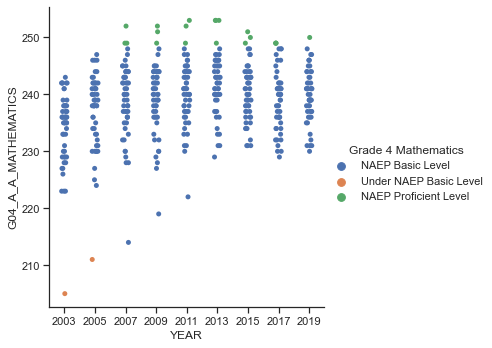

In [169]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="YEAR", y="G04_A_A_MATHEMATICS",  hue="Grade 4 Mathematics", data=df_sub)

### 8th Grade Math:

Grade 8 Mathematics:
- NAEP Basic 262
- NAEP Proficient 299
- NAEP Advanced 333

In [125]:
df_sub.loc[df_sub['G08_A_A_MATHEMATICS'] < 262, 'Grade 8 Mathematics'] = 'Under NAEP Basic Level'


In [126]:
df_sub.loc[(df_sub['G08_A_A_MATHEMATICS'] >= 262) & (df_sub['G08_A_A_MATHEMATICS'] < 299), 'Grade 8 Mathematics'] = 'NAEP Basic Level'


In [127]:
df_sub.loc[(df_sub['G08_A_A_MATHEMATICS'] >= 299) & (df_sub['G08_A_A_MATHEMATICS'] < 333), 'Grade 8 Mathematics'] = 'NAEP Proficient Level'


In [128]:
df_sub.loc[df_sub['G08_A_A_MATHEMATICS'] >= 333, 'Grade 8 Mathematics'] = 'NAEP Advanced Level & Above'


In [129]:
df_sub['Grade 8 Mathematics'].value_counts(dropna = False)

NAEP Basic Level          468
Under NAEP Basic Level      6
NAEP Proficient Level       3
Name: Grade 8 Mathematics, dtype: int64

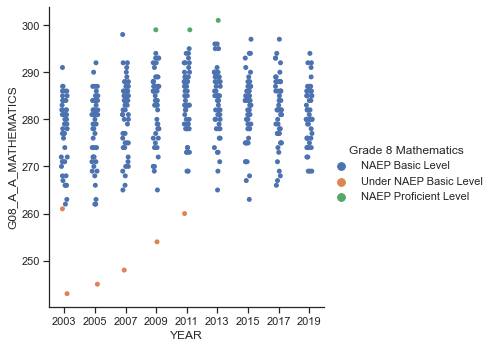

In [168]:
# Create a categorical plot in seaborn using the  categories created above

sns.set(style="ticks")
g = sns.catplot(x="YEAR", y="G08_A_A_MATHEMATICS", edgecolor=".8", hue="Grade 8 Mathematics", data=df_sub)


Comparing the two groups of 4th and 8th graders it looks like the 4th grade math has done an overall better job with more students meeting NAEP's Proficient level in 4th grade math than in the 8th grade level. 
Overall, most students in both grdaes are meeting NAEP's basic level in Mathematics in their grade levels and although the overall trend of the assessment scores is slightly increasing (with both grade groups decreasing in th epast 5 years) the goo dnews is that the number of students under the NAEP's Basic Level in math is decreasing in both 4th and 8th grade levels.

## NAEP Reading Assessment:

The NAEP Reading Achievement Levels by Grade
- Grade 4 Reading:

  <p> - NAEP Basic 208 </p>
  <p> - NAEP Proficient 238 </p>
  <p> - NAEP Advanced 268 </p>


- Grade 8 Reading:

  <p> - NAEP Basic 243 </p>
  <p> - NAEP Proficient 281 </p>
  <p> - NAEP Advanced 323 </p>
  
  
Source:  https://nces.ed.gov/nationsreportcard/reading/achieve.aspx

### 4th Grade Reading:


Grade 4 Reading:
- NAEP Basic    208
- NAEP Proficient    238
- NAEP Advanced    268

In [146]:
df_sub.loc[df_sub['G04_A_A_READING'] < 208, 'Grade 4 Reading'] = 'Under NAEP Basic Level'

In [147]:
df_sub.loc[(df_sub['G04_A_A_READING'] >= 208) & (df_sub['G04_A_A_READING'] < 238), 'Grade 4 Reading'] = 'NAEP Basic Level'


In [152]:
df_sub.loc[(df_sub['G04_A_A_READING'] >= 237) & (df_sub['G04_A_A_READING'] < 268), 'Grade 4 Reading'] = 'NAEP Proficient Level'


In [153]:
df_sub.loc[df_sub['G04_A_A_READING'] >= 268, 'Grade 4 Reading'] = 'NAEP Advanced Level & Above'

In [154]:
df_sub['Grade 4 Reading'].value_counts(dropna = True)

NAEP Basic Level          453
Under NAEP Basic Level     23
NAEP Proficient Level       1
Name: Grade 4 Reading, dtype: int64

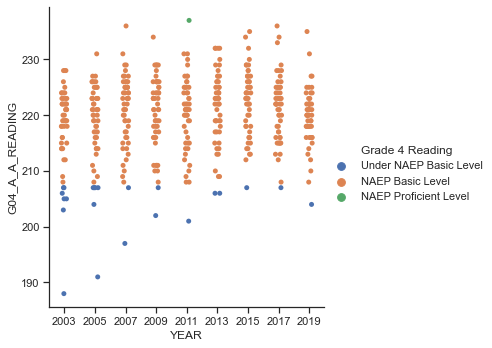

In [167]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="YEAR", y="G04_A_A_READING",  hue="Grade 4 Reading", data=df_sub)

### 8th Grade Reading:


Grade 8 Reading:
- NAEP Basic    243
- NAEP Proficient    281
- NAEP Advanced    323

In [158]:
df_sub.loc[df_sub['G08_A_A_READING'] < 243, 'Grade 8 Reading'] = 'Under NAEP Basic Level'

In [159]:
df_sub.loc[(df_sub['G08_A_A_READING'] >= 243) & (df_sub['G08_A_A_READING'] < 281), 'Grade 8 Reading'] = 'NAEP Basic Level'



In [160]:
df_sub.loc[(df_sub['G08_A_A_READING'] >= 281) & (df_sub['G08_A_A_READING'] < 323), 'Grade 8 Reading'] = 'NAEP Proficient Level'



In [161]:
df_sub.loc[df_sub['G08_A_A_READING'] >= 323, 'Grade 8 Reading'] = 'NAEP Advanced Level & Above'

In [165]:
df_sub['Grade 8 Reading'].value_counts(dropna = True)

NAEP Basic Level          472
Under NAEP Basic Level      5
Name: Grade 8 Reading, dtype: int64

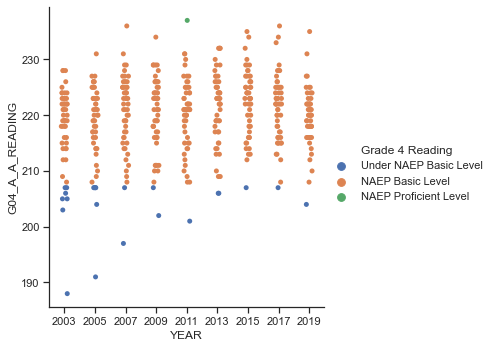

In [166]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="YEAR", y="G04_A_A_READING", hue = "Grade 4 Reading", data=df_sub)

Looking at the Reading Categorical Plots in Reading Assessment in both 4th and 8th grade levels it is interesting to see that the overall performance in reading in both groups is lower compared to mathematics assessment. There are hardly any students in the "NAEP Advanced Level & Above" and there are more students in the "Under NAEP Basic Level" compared to the math assessment, **BUT** the good news is that most students in both groups meet the NAEP's Basic Level in Reading Assessment. 

#### Hypotheses:
One potential hypothesis based on the pair plots can be:

- If a state has a higher Instruction Expenditure, then the average Mathematics and Reading Assessment scores (in both 4th and 8th grade level) in that state are higher. 

An extension to this hypotheses is:

- If a state has a higher Instruction Expenditure, then the average Mathematics and Reading Assessment scores in Hispanic and Black student demographic groups (in both 4th and 8th grade level) in that state are higher.